Notes
- EDA
- Data Cleaning
- Outlier detection
- Manual Cluster
- Basic statistik
- Conclusion EDA
- Encoding
- Advance Statistik (Feature selection)
- Scalling
- Run Model
- Prediction
- Ecaluate
- Conclusion

Variable
- df (EDA)
- df1 (Data Cleaning) - Duplicated, fill missing data, drop column more than 50%, Round AGE and remove Rows with Age/ FARE == 0,  Handle Outlier
- df2 - Handle Outlier) so no outlier detected, no need to remove
- df3- im using copy from df1 and make copy for df3 (Manual Cluster) and statistik cleaned
- df_category & df_numeric (Split)
- Using df4 copy back by df3
- df5 settle encoding
- df6 drop Sex_male
- data_predict
- data_predict1 - already drop column not relevant for doing prediction and handle missing value
- data_predict2 - ALready cluster and drop column Age
- data_predict3 - settle encding
- data_predict4 - already delete column sex_male


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# A) EDA

In [3]:
df = pd.read_csv('Data/train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.isnull().sum()/len(df)* 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

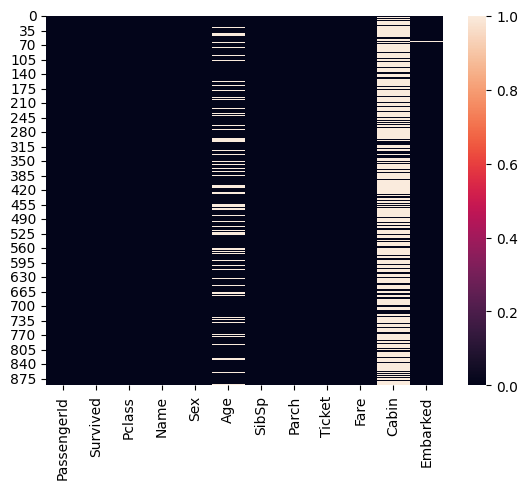

In [12]:
sns.heatmap(df.isnull())

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# B) Data Cleaning

In [14]:
df1 = df.copy()

In [15]:
df1.duplicated().sum() 

np.int64(0)

In [16]:
# Fill in the missing data by median and mode for Age and Embarked

df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [17]:
# Drop Cabin column because missing data more than 50%

df1.drop('Cabin', axis=1, inplace=True)

In [18]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

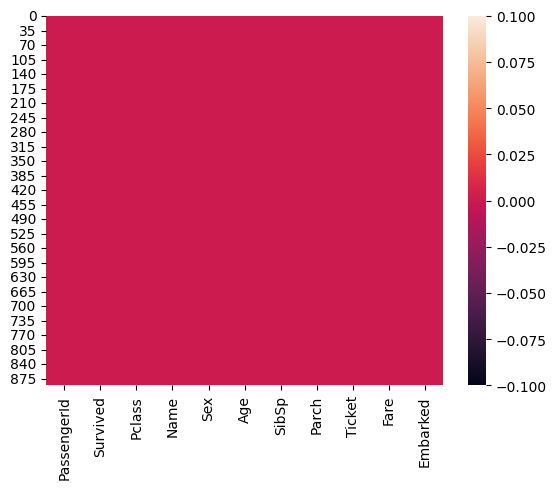

In [19]:
sns.heatmap(df1.isnull())

In [20]:
df1['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
# Rounded the 'Age' column to the nearest integer for easier analysis and consistency
df1['Age'] = df1['Age'].round()

In [22]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [23]:
# Filter rows where 'Age' is 0
age_zero = df1[df1['Age'] == 0]
age_zero 


PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

     Age  SibSp  Parch Ticket    Fare Embarked  
803  0.0      0      1   2625  8.5167        C

In [24]:
# Drop rows 'Age' = 0
df1.drop(df1[df1['Age'] == 0].index, inplace=True)


In [25]:
# Drop rows 'Fare' = 0
df1.drop(df1[df1['Fare'] == 0].index, inplace=True)

## Outlier Detection

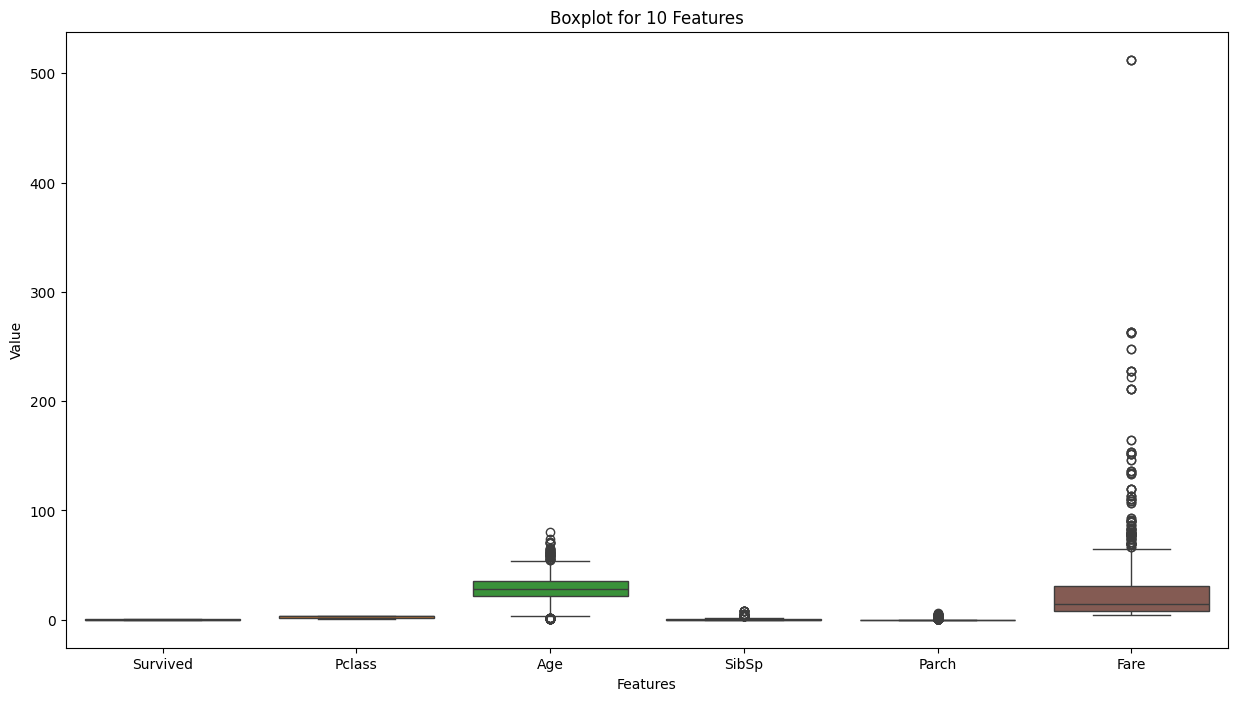

In [26]:
features = ['Survived', 'Pclass', 'Age', 'SibSp', 
            'Parch', 'Fare',]

plt.figure(figsize=(15, 8))

sns.boxplot(data=df1[features])

plt.title("Boxplot for 10 Features")
plt.xlabel("Features")
plt.ylabel("Value")


plt.show()

Text(0.5, 0, 'Age')

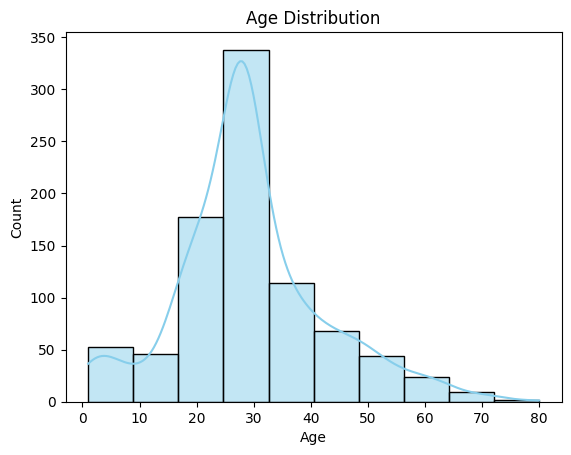

In [27]:
sns.histplot(df1['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

In [28]:
from scipy.stats import skew

Age = df1["Age"]  
skewness = skew(Age)
print(f"Skewness: {skewness}")

Skewness: 0.5232557649620477


Text(0.5, 0, 'Fare')

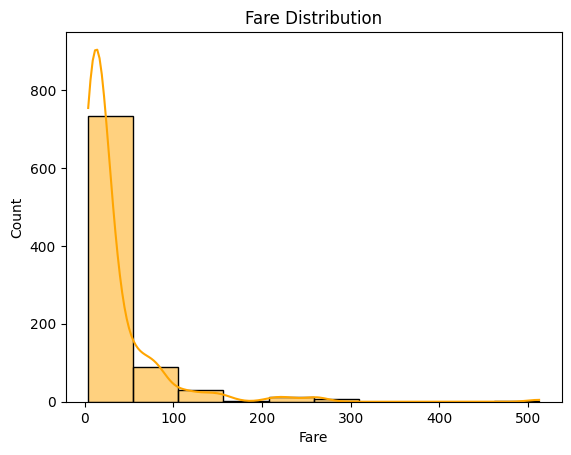

In [29]:
sns.histplot(df1['Fare'], kde=True, bins=10, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')

In [30]:
Fare = df1["Fare"]  
skewness = skew(Fare)
print(f"Skewness: {skewness}")

Skewness: 4.7596181097237595


## Z-SCORE AND TURKEY METHOD

In [31]:
# so now age dan fare ade outliers, then now kene tahu nak guna method ape je skrng untuk buang outlliers tersebut

- Age = Z-Score
- Fare = Tukey method

Buat dataframe copy klau nk buat Zscore

In [32]:
# Make a copy for outliers Handling
df2 = df1.copy()

In [33]:
# Z-Score Method

from scipy.stats import zscore

df2['Age Z-Score'] = zscore(df2['Age'])
outliers = df2[(df2['Age Z-Score'] > 3) | (df2['Age Z-Score'] < -3)]
outliers 

PassengerId  Survived  Pclass                                  Name  \
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Embarked  Age Z-Score  
96   male  71.0      0      0    PC 17754  34.6542        C     3.190061  
116  male  70.0      0      0      370369   7.7500        Q     3.113456  
493  male  71.0      0      0    PC 17609  49.5042        C     3.190061  
630  male  80.0      0      0       27042  30.0000        S     3.879498  
672  male  70.0      0      0  C.A. 24580  10.5000        S     3.113456  
745  male  70.0      1      1   WE/P 5735  71.0000        S     3.113456  
851  male  74.0      0      0      347060   7.7750        S     3.419873

In [34]:
outliers.shape

(7, 12)

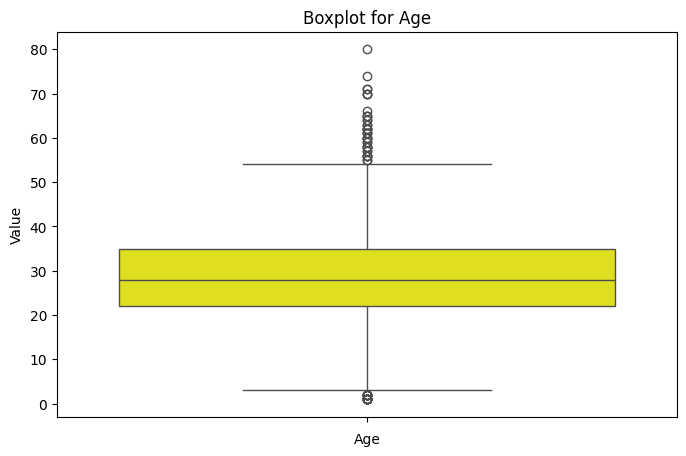

In [35]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df2['Age'],color = 'yellow')

plt.title("Boxplot for Age")
plt.xlabel("Age")
plt.ylabel("Value")


plt.show()

In [36]:
df2['Age'].describe()

count    875.000000
mean      29.356571
std       13.061584
min        1.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

- The outliers in the Age column (e.g., 70, 71, 74, 80) are valid and represent realistic ages of Titanic passengers. These values are contextually important, especially for understanding survival patterns and demographics, as older passengers were likely part of higher social classes. Since the ages are logical and show no signs of error, they will be retained in the dataset to avoid bias in the analysis.

In [37]:
# Turkey Method

Q1_fare = df2['Fare'].quantile(0.25)
Q3_fare = df2['Fare'].quantile(0.75)
IQR_fare = Q3_fare-Q1_fare 
print(f'IQR fare is {IQR_fare}')

IQR fare is 23.349999999999998


In [38]:
LF_fare = Q1_fare - 1.5 * IQR_fare
UF_fare = Q3_fare + 1.5 * IQR_fare
print(f'LF fare is {LF_fare} while UF fare is {UF_fare}')

LF fare is -27.099999999999998 while UF fare is 66.3


In [39]:
outliers_fare = df2[df2['Fare'] < -27]
outliers_fare

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Age Z-Score]
Index: []

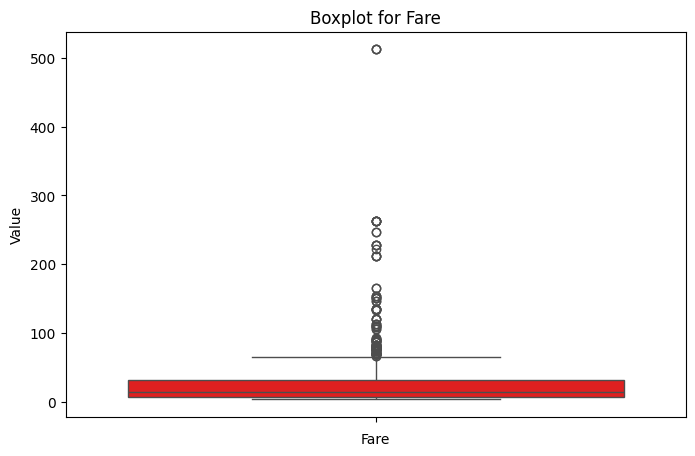

In [40]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df2['Fare'],color= 'red')

plt.title("Boxplot for Fare")
plt.xlabel("Fare")
plt.ylabel("Value")


plt.show()

- There are no outliers for the Lower Fence (LF) as no fares are below -27. However, there are fares exceeding 66.3 (Upper Fence). These values will not be removed as they are reasonable, representing first-class or premium fares.

## Conclusion

- For the Age column, values with decimal points will be rounded to the nearest whole number, and any rows with an Age value of 0 will be removed.
- Any Fare values equal to 0 will be removed.
- The Column variable has the most missing data (77%), so this variable will be dropped, as it is not used in the analysis.
- Any missing Age data will be replaced with the median, and missing Embarked data will be replaced with the mode.
- There are outliers in both Age and Fare, but they will not be removed as their values are logical.


# C) Manual Cluster

In [41]:
df3 = df1.copy()

### Age Cluster

- 0-17 (Children)
- 18-35 (Young Adults)
- 36-55 (Middle-Aged Adults)
- 56-80 (Old)


In [42]:
bins = [0, 17, 35, 55, 100]  
labels = ['Children', 'Young Adults', 'Middle-Aged Adults', 'Old']  

df3['Age_Category'] = pd.cut(df3['Age'], bins=bins, labels=labels, right=False)


print(df3[['Age', 'Age_Category']])

      Age        Age_Category
0    22.0        Young Adults
1    38.0  Middle-Aged Adults
2    26.0        Young Adults
3    35.0  Middle-Aged Adults
4    35.0  Middle-Aged Adults
..    ...                 ...
886  27.0        Young Adults
887  19.0        Young Adults
888  28.0        Young Adults
889  26.0        Young Adults
890  32.0        Young Adults

[875 rows x 2 columns]


In [43]:
df3['Age_Category'].value_counts()

Age_Category
Young Adults          546
Middle-Aged Adults    188
Children               99
Old                    42
Name: count, dtype: int64

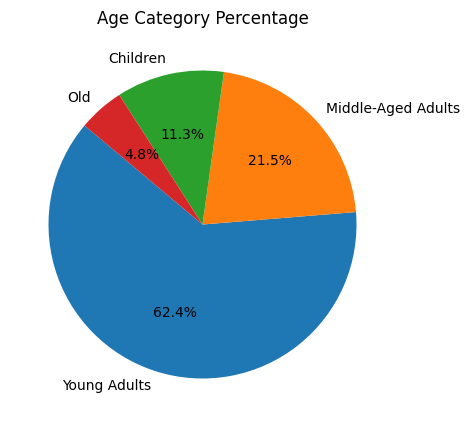

In [44]:
import matplotlib.pyplot as plt


category_counts = df3['Age_Category'].value_counts()


category_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), startangle=140)

plt.title('Age Category Percentage')
plt.ylabel('')  #
plt.show()


### Fare Cluster

- 0-50: Cheap
- 51-100: Moderate
- 101-200: Expensive
- 201-700: Premium


In [45]:
bins = [0, 50, 100, 200, 700]  
labels = ['Cheap', 'Moderate', 'Expensive', 'Premium'] 


df3['Fare_Category'] = pd.cut(df3['Fare'], bins=bins, labels=labels, right=False)

print(df3[['Fare', 'Fare_Category']].head())


      Fare Fare_Category
0   7.2500         Cheap
1  71.2833      Moderate
2   7.9250         Cheap
3  53.1000      Moderate
4   8.0500         Cheap


In [46]:
df3['Fare_Category'].value_counts()

Fare_Category
Cheap        714
Moderate     108
Expensive     33
Premium       20
Name: count, dtype: int64

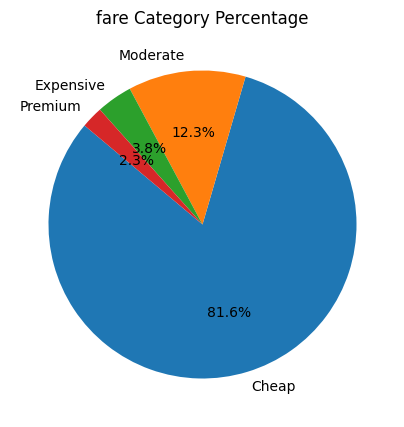

In [47]:
category_counts_fare = df3['Fare_Category'].value_counts()


category_counts_fare.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), startangle=140)

plt.title('fare Category Percentage')
plt.ylabel('')  
plt.show()

- Most passengers are in the "Cheap" fare category and the "Young Adults" age group. The "Premium" fare category and "Old" age group have the fewest passengers.

In [48]:
age_fare = df3.groupby(['Age_Category', 'Fare_Category']).size().reset_index(name='Count')
age_fare 

Age_Category Fare_Category  Count
0             Children         Cheap     91
1             Children      Moderate      3
2             Children     Expensive      4
3             Children       Premium      1
4         Young Adults         Cheap    464
5         Young Adults      Moderate     58
6         Young Adults     Expensive     13
7         Young Adults       Premium     11
8   Middle-Aged Adults         Cheap    128
9   Middle-Aged Adults      Moderate     40
10  Middle-Aged Adults     Expensive     13
11  Middle-Aged Adults       Premium      7
12                 Old         Cheap     31
13                 Old      Moderate      7
14                 Old     Expensive      3
15                 Old       Premium      1

### Class ticket

In [49]:
Pclass_fare = df3.groupby(['Pclass', 'Fare_Category']).size().reset_index(name='Count')
Pclass_fare 

Pclass Fare_Category  Count
0        1         Cheap     71
1        1      Moderate     87
2        1     Expensive     33
3        1       Premium     20
4        2         Cheap    171
5        2      Moderate      7
6        2     Expensive      0
7        2       Premium      0
8        3         Cheap    472
9        3      Moderate     14
10       3     Expensive      0
11       3       Premium      0

- The Premium tickets are mostly associated with Pclass 1, but the number is relatively low compared to the Cheap and Moderate categories. Passengers in Pclass 2 and Pclass 3 tend to choose Cheap tickets, with Pclass 2 showing limited interest in Moderate tickets, while Pclass 3 almost exclusively selects the cheapest ticket category.

### Sex variable

In [50]:
df3['Sex'].value_counts()

Sex
male      561
female    314
Name: count, dtype: int64

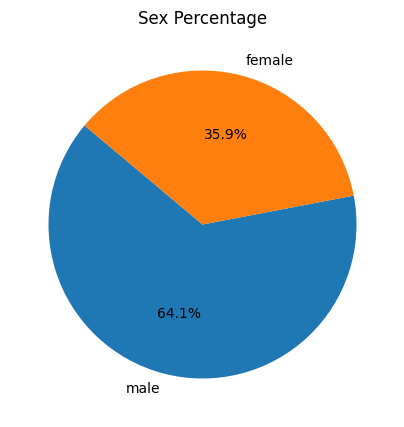

In [51]:
Sex_count = df3['Sex'].value_counts()


Sex_count.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), startangle=140)

plt.title('Sex Percentage')
plt.ylabel('')  #
plt.show()

### Survived Variable

In [52]:
df3['Survived'].value_counts()

Survived
0    535
1    340
Name: count, dtype: int64

### Cross with Survived (Count plot)

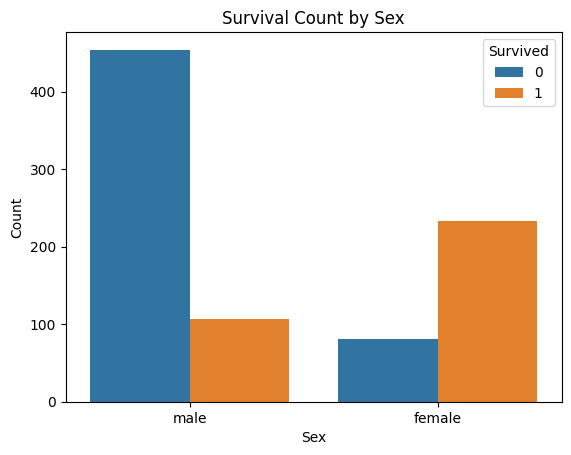

In [53]:
# Count plot 
sns.countplot(x='Sex', hue='Survived', data=df3)

plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

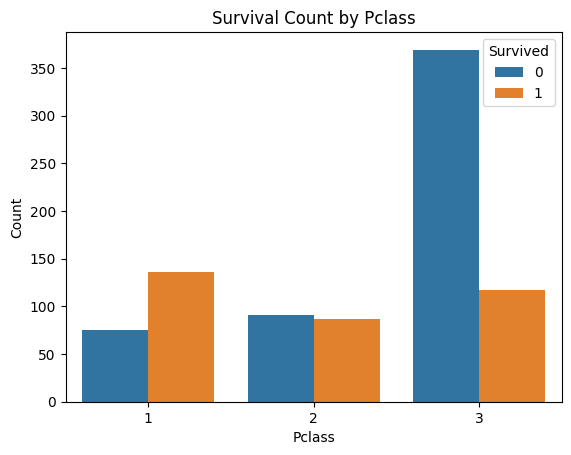

In [54]:
# Count plot 
sns.countplot(x='Pclass', hue='Survived', data=df3)

plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

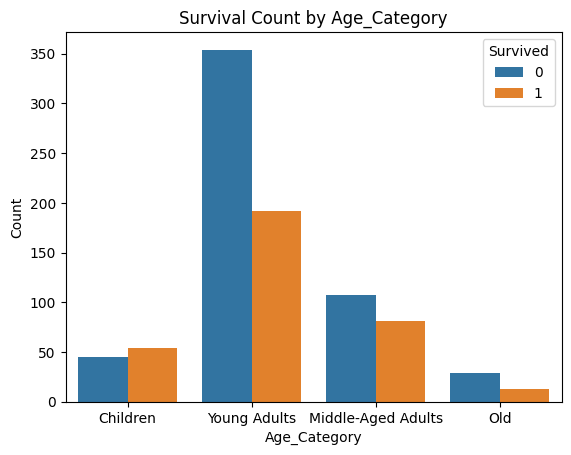

In [55]:
# Count plot 
sns.countplot(x='Age_Category', hue='Survived', data=df3)

plt.title('Survival Count by Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Count')
plt.show()

### Cross with Survived (Bar plot)

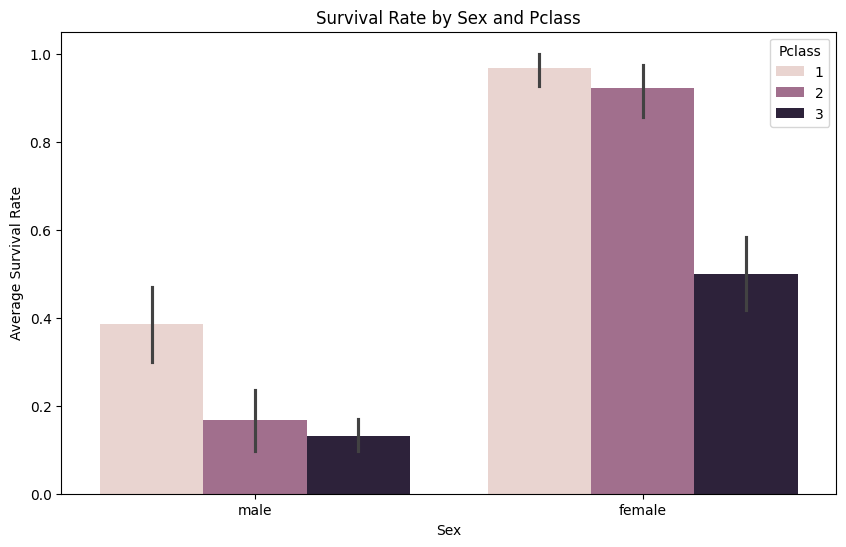

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df3, x='Sex', hue='Pclass', y='Survived' )

plt.title('Survival Rate by Sex and Pclass')
plt.xlabel('Sex')
plt.ylabel('Average Survival Rate')

plt.show()

In [57]:
Pclass_sex = df3.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
Pclass_sex 

Pclass     Sex  Count
0       1  female     94
1       1    male    117
2       2  female     76
3       2    male    102
4       3  female    144
5       3    male    342

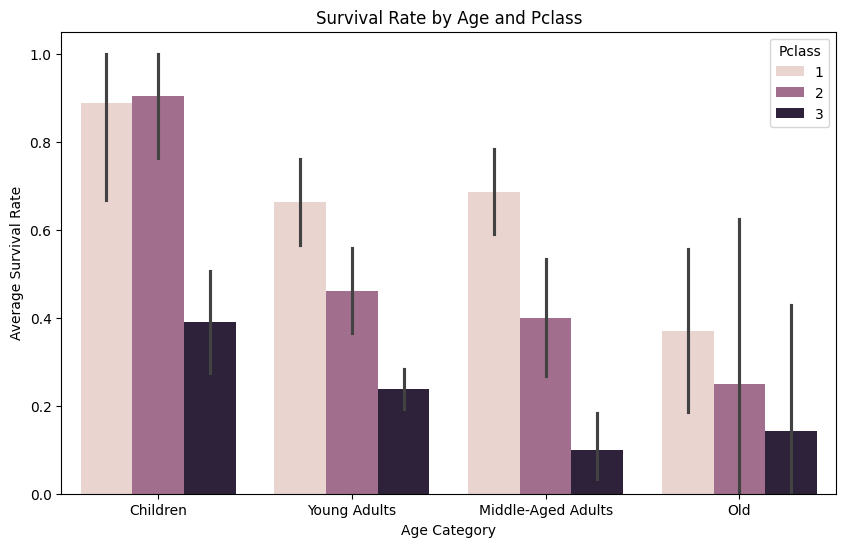

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df3, x='Age_Category', hue='Pclass', y='Survived' )

plt.title('Survival Rate by Age and Pclass')
plt.xlabel('Age Category')
plt.ylabel('Average Survival Rate')

plt.show()

In [59]:
Pclass_sex = df3.groupby(['Pclass', 'Age_Category']).size().reset_index(name='Count')
Pclass_sex 

Pclass        Age_Category  Count
0        1            Children      9
1        1        Young Adults     92
2        1  Middle-Aged Adults     83
3        1                 Old     27
4        2            Children     21
5        2        Young Adults    104
6        2  Middle-Aged Adults     45
7        2                 Old      8
8        3            Children     69
9        3        Young Adults    350
10       3  Middle-Aged Adults     60
11       3                 Old      7

In [60]:
# Make a save fle  copy df3 cleaned

df_cleaned = df3.copy()
df_cleaned.to_csv('df_cleaned.csv', index=False)

# D) Basic statistc

In [61]:
df3.describe(include='all')

PassengerId    Survived      Pclass                 Name   Sex  \
count    875.000000  875.000000  875.000000                  875   875   
unique          NaN         NaN         NaN                  875     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   561   
mean     444.384000    0.388571    2.314286                  NaN   NaN   
std      257.667195    0.487704    0.835820                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      220.500000    0.000000    2.000000                  NaN   NaN   
50%      444.000000    0.000000    3.000000                  NaN   NaN   
75%      666.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  \
count   875.000000  875.000000  875.000000     875  875.000000      875   
unique         NaN         NaN         NaN     670         NaN        3   
top            NaN         NaN         NaN  347082         NaN        S   
freq           NaN         NaN         NaN       7         NaN      631   
mean     29.356571    0.532571    0.387429     NaN   32.783352      NaN   
std      13.061584    1.110498    0.811574     NaN   49.958651      NaN   
min       1.000000    0.000000    0.000000     NaN    4.012500      NaN   
25%      22.000000    0.000000    0.000000     NaN    7.925000      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.500000      NaN   
75%      35.000000    1.000000    0.000000     NaN   31.275000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

        Age_Category Fare_Category  
count            875           875  
unique             4             4  
top     Young Adults         Cheap  
freq             546           714  
mean             NaN           NaN  
std              NaN           NaN  
min              NaN           NaN  
25%              NaN           NaN  
50%              NaN           NaN  
75%              NaN           NaN  
max              NaN           NaN

In [62]:
Age_mode = df3['Age'].value_counts()
Age_mode.head(1)

Age
28.0    196
Name: count, dtype: int64

In [63]:
Fare_mode = df3['Fare'].value_counts()
Fare_mode.head(1)

Fare
8.05    43
Name: count, dtype: int64

In [64]:
df3['Pclass'].value_counts()


Pclass
3    486
1    211
2    178
Name: count, dtype: int64

# E) Conclusion EDA

### Visual Findings:

- **Age Category:** The "Young Adults" category recorded the highest number of passengers, with 546 people, indicating that the majority of Titanic passengers were between the ages of 18 and 35. The "Middle-Aged Adults" category also recorded a significant number, while the "Children" and "Old" categories had fewer passengers.

- **Ticket Fare:** The "Cheap" ticket category was the most purchased, with 714 passengers, reflecting that most passengers chose lower-priced tickets. This was followed by the "Moderate", "Expensive", and "Premium" categories, each with considerably fewer passengers.

- **Survival Rate:** Women had a higher survival rate in all classes, especially in first and second classes. Both "Young Adults" and "Children" also showed high survival rates, with children having the highest survival rate, especially in first and second-class tickets. "Pclass 1" had the highest survival rate.

- **Pclass and Gender:** Class 1 showed a higher survival rate compared to Class 2 and Class 3. Males were more dominant on the ship, but women had a higher survival rate, especially in Class 1.

---

### Statistics:

- **Age:** Titanic passengers had a wide range of ages, with the youngest being 1 year old and the oldest being 80 years old. The average age was 29 years, and the high standard deviation (13.06) indicates a large variation in the ages of the passengers.

- **Ticket:** There were 670 unique tickets out of 875 passenger records, with the ticket "Dooley, Mr. Patrick" appearing 7 times. This suggests that some passengers may have shared the same ticket.

- **Age Category and Ticket Fare:** The "Young Adults" category dominated with 546 passengers, while the "Cheap" ticket category was the most popular choice, with 714 passengers. This shows a clear pattern in ticket purchases and age grouping in the Titanic passenger data.


# F) Encoding & Adcance Statistic

In [65]:
df_category = df3.copy()
df_numeric = df3.copy()

## 1) Category

In [66]:
df_category.drop(columns=['PassengerId','Pclass','Age','Name','SibSp','Parch','Ticket','Fare'], inplace=True)
df_category.head()

Survived     Sex Embarked        Age_Category Fare_Category
0         0    male        S        Young Adults         Cheap
1         1  female        C  Middle-Aged Adults      Moderate
2         1  female        S        Young Adults         Cheap
3         1  female        S  Middle-Aged Adults      Moderate
4         0    male        S  Middle-Aged Adults         Cheap

In [67]:
# Step 1: Create a copy of the DataFrame
df_category = df3.copy()

# Step 2: Drop unnecessary columns
df_category.drop(columns=['PassengerId', 'Pclass', 'Age', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], inplace=True)

# Step 3: One-Hot Encoding for 'Sex' and 'Embarked'
df_category = pd.get_dummies(df_category, columns=['Sex', 'Embarked'], drop_first=False)

# Step 4: Label Encoding for 'Age_Category' and 'Fare_Category'
df_category['Age_Category'] = df_category['Age_Category'].astype('category').cat.codes
df_category['Fare_Category'] = df_category['Fare_Category'].astype('category').cat.codes

# Step 5: Convert all columns to integer type
df_category = df_category.astype(int)

# Final output
df_category.head()


Survived  Age_Category  Fare_Category  Sex_female  Sex_male  Embarked_C  \
0         0             1              0           0         1           0   
1         1             2              1           1         0           1   
2         1             1              0           1         0           0   
3         1             2              1           1         0           0   
4         0             2              0           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [68]:
# Sex_male, Embarked are norminal while Age and Fare are ordinal
# Spearman = Ordinal
# Ujian Chi-Square = Norminal

## Spearman

In [69]:
df_ordinal = df_category[['Survived', 'Age_Category', 'Fare_Category']]

spearman_corr = df_ordinal.corr(method='spearman')
print("Spearman's Rank Correlation:")
print(spearman_corr)


Spearman's Rank Correlation:
               Survived  Age_Category  Fare_Category
Survived       1.000000     -0.039691       0.282877
Age_Category  -0.039691      1.000000       0.189734
Fare_Category  0.282877      0.189734       1.000000


- Both 'Age_Category' and 'Fare_Category' are included because, although the correlation between 'Age_Category' and 'Survived' is weak,
- age categories may still provide valuable information about survival, especially in the Titanic context, where age played a role in rescue policies.
- Additionally, both features may interact with other variables in the dataset, potentially improving model performance.
- Therefore, we opt to retain both features in the model to ensure a more comprehensive representation of the data and increase the chances of a more accurate model.

## Chi square

In [70]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for 'Survived' and each categorical variable
contingency_tables = {}
p_values = {}

# List of categorical columns (excluding Survived)
categorical_columns = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


for col in categorical_columns:
    # Create a contingency table for 'Survived' and the current column
    contingency_table = pd.crosstab(df_category['Survived'], df_category[col])
    contingency_tables[col] = contingency_table
    
    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[col] = p

# Display the results
print("Chi-Square Test p-values for each variable:")
for col, p_val in p_values.items():
    print(f"{col}: p-value = {p_val}")


Chi-Square Test p-values for each variable:
Sex_female: p-value = 1.879529915616192e-57
Sex_male: p-value = 1.8795299156162196e-57
Embarked_C: p-value = 2.6510438147325743e-06
Embarked_Q: p-value = 1.0
Embarked_S: p-value = 3.663591494789614e-05


- Based on the results of the Chi-Square test, only the Sex variable (gender) shows a significant relationship with survival, as the p-values for Sex_female and Sex_male are extremely small (less than 0.05). On the other hand, the Embarked variable (port of embarkation) has p-values greater than 0.05 for Embarked_Q, and while Embarked_C and Embarked_S show smaller p-values, they do not provide a strong enough influence to be considered important variables for further analysis.

- Therefore, for further analysis and model building, I will only include the Sex variable and exclude the Embarked variable, as embarkation does not show a significant relationship with survival based on the Chi-Square test results.

Selection feature Category
- Age_Category, Fare_Category and Sex

## Multikolineariti 

In [71]:
from statsmodels.tools.tools import add_constant  # Import the add_constant function
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df_category[['Age_Category', 'Fare_Category', 'Sex_female']]  
X = add_constant(X)


vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


         feature       VIF
0          const  4.738896
1   Age_Category  1.033706
2  Fare_Category  1.064339
3     Sex_female  1.044901


Selection feature Category

- Age_Category, Fare_Category and Sex_female

## 2) Numerical

In [72]:
#df_numeric.drop(columns=['PassengerId','Name','Sex','Ticket','Embarked','Age_Category','Fare_Category'], inplace=True)
df_numeric.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked        Age_Category Fare_Category  
0      0         A/5 21171   7.2500        S        Young Adults         Cheap  
1      0          PC 17599  71.2833        C  Middle-Aged Adults      Moderate  
2      0  STON/O2. 3101282   7.9250        S        Young Adults         Cheap  
3      0            113803  53.1000        S  Middle-Aged Adults      Moderate  
4      0            373450   8.0500        S  Middle-Aged Adults         Cheap

## Pearson

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation matrix
#correlation_matrix = df_numeric.corr()

# Create a heatmap to visualize the correlation matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
#plt.title("Correlation Heatmap")
#plt.show()


## Multikolineariti

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare the data for VIF calculation
X = df_numeric[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] 
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


  feature        VIF
0   const  29.980186
1  Pclass   1.694723
2     Age   1.204028
3   SibSp   1.273571
4   Parch   1.259620
5    Fare   1.613144


Based on the correlation and multicollinearity analysis, the feature selection can be summarized as follows:

- Pclass and Fare show a stronger correlation with Survived, making them important features for the model.
- Age, SibSp, and Parch show weak correlations with Survived and could be less relevant. However, they do not cause multicollinearity issues.
- There is no significant multicollinearity, as all features have VIF values well below the threshold of 5.
- Therefore, the recommended features for the model are Pclass, Fare, and possibly SibSp or Parch (depending on whether family relationships are considered important). Age can be excluded due to its weak correlation with Survived.

Feature selection Numeric
- Pclass and Fare

# G) Scalling (StandardScaler)

# Feature selection 
- Age_Category, Fare_Category and Sex_female
- Pclass and Fare
- y = survived

In [75]:
df4 = df3.copy()
df4.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked','Fare_Category','Parch','SibSp','Age'], inplace=True)


In [76]:
df4.head()

Survived  Pclass     Sex     Fare        Age_Category
0         0       3    male   7.2500        Young Adults
1         1       1  female  71.2833  Middle-Aged Adults
2         1       3  female   7.9250        Young Adults
3         1       1  female  53.1000  Middle-Aged Adults
4         0       3    male   8.0500  Middle-Aged Adults

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df5 = df4.copy()


df5 = pd.get_dummies(df5, columns=['Sex'], drop_first=False)  

df5['Sex_female'] = df5['Sex_female'].astype(int)
df5['Sex_male'] = df5['Sex_male'].astype(int)

label_encoder = LabelEncoder()
df5['Age_Category'] = label_encoder.fit_transform(df5['Age_Category'])


df5.head()

Survived  Pclass     Fare  Age_Category  Sex_female  Sex_male
0         0       3   7.2500             3           0         1
1         1       1  71.2833             1           1         0
2         1       3   7.9250             3           1         0
3         1       1  53.1000             1           1         0
4         0       3   8.0500             1           0         1

In [78]:
df6 = df5.copy()
df6.drop(columns=['Sex_male'], inplace=True)
df6.head()

Survived  Pclass     Fare  Age_Category  Sex_female
0         0       3   7.2500             3           0
1         1       1  71.2833             1           1
2         1       3   7.9250             3           1
3         1       1  53.1000             1           1
4         0       3   8.0500             1           0

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df6[['Fare', 'Pclass']] = scaler.fit_transform(df6[['Fare', 'Pclass']])

df6.head()

Survived    Pclass      Fare  Age_Category  Sex_female
0         0  0.820879 -0.511382             3           0
1         1 -1.573351  0.771077             1           1
2         1  0.820879 -0.497863             3           1
3         1 -1.573351  0.406902             1           1
4         0  0.820879 -0.495360             1           0

# H) Run Model

In [80]:
df6.head()

Survived    Pclass      Fare  Age_Category  Sex_female
0         0  0.820879 -0.511382             3           0
1         1 -1.573351  0.771077             1           1
2         1  0.820879 -0.497863             3           1
3         1 -1.573351  0.406902             1           1
4         0  0.820879 -0.495360             1           0

## KNN

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df6.drop(columns=['Survived'])
y = df6['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       115
           1       0.79      0.68      0.73        60

    accuracy                           0.83       175
   macro avg       0.82      0.79      0.80       175
weighted avg       0.83      0.83      0.83       175


Confusion Matrix:
 [[104  11]
 [ 19  41]]


In [82]:
# Save the model

import joblib

# Save the trained model to a file
joblib.dump(knn, 'knn_model.pkl')


['knn_model.pkl']

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df6.drop(columns=['Survived'])
y = df6['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Accuracy: 0.8057142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       115
           1       0.74      0.67      0.70        60

    accuracy                           0.81       175
   macro avg       0.79      0.77      0.78       175
weighted avg       0.80      0.81      0.80       175


Confusion Matrix:
 [[101  14]
 [ 20  40]]


## Conclusion

**K-Nearest Neighbors (KNN):**

- Accuracy: 82.86%
- Performs better overall with higher precision and recall for both classes.
- Handles the balance between class 0 (not survived) and class 1 (survived) better.
- Suitable for smaller datasets and simpler problems.
- 
**Random Forest:**

- Accuracy: 80.57%
- Performs well for class 0 (not survived) but shows slightly lower recall for class 1 (survived).
- More robust for larger datasets or those with more noise and complex patterns.

## Prediction on Data

In [84]:
data_predict = pd.read_csv('Data/test.csv')
data_predict.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Data Cleaning on prediction data

In [85]:
data_predict.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [86]:
data_predict1 = data_predict.copy()
data_predict1.drop(columns=['Name', 'Ticket', 'Embarked','Parch','SibSp','Cabin'], inplace=True)


In [87]:
data_predict1.head()

PassengerId  Pclass     Sex   Age     Fare
0          892       3    male  34.5   7.8292
1          893       3  female  47.0   7.0000
2          894       2    male  62.0   9.6875
3          895       3    male  27.0   8.6625
4          896       3  female  22.0  12.2875

In [88]:
# Fill in the missing data by median and mode for Age and Embarked

data_predict1['Age'].fillna(df1['Age'].median(), inplace=True)
data_predict1['Fare'].fillna(df1['Fare'].median(), inplace=True)

In [89]:
data_predict1.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [90]:
data_predict1.describe()

PassengerId      Pclass         Age        Fare
count   418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   29.805024   35.576645
std     120.810458    0.841838   12.667969   55.850061
min     892.000000    1.000000    0.170000    0.000000
25%     996.250000    1.000000   23.000000    7.895800
50%    1100.500000    3.000000   28.000000   14.454200
75%    1204.750000    3.000000   35.750000   31.471875
max    1309.000000    3.000000   76.000000  512.329200

## Age Clsuter

In [91]:
data_predict1.head()

PassengerId  Pclass     Sex   Age     Fare
0          892       3    male  34.5   7.8292
1          893       3  female  47.0   7.0000
2          894       2    male  62.0   9.6875
3          895       3    male  27.0   8.6625
4          896       3  female  22.0  12.2875

In [92]:
data_predict2 = data_predict1.copy()

In [93]:
bins = [0, 17, 35, 55, 100]  
labels = ['Children', 'Young Adults', 'Middle-Aged Adults', 'Old']  

data_predict2['Age_Category'] = pd.cut(data_predict2['Age'], bins=bins, labels=labels, right=False)

data_predict2.head()

PassengerId  Pclass     Sex   Age     Fare        Age_Category
0          892       3    male  34.5   7.8292        Young Adults
1          893       3  female  47.0   7.0000  Middle-Aged Adults
2          894       2    male  62.0   9.6875                 Old
3          895       3    male  27.0   8.6625        Young Adults
4          896       3  female  22.0  12.2875        Young Adults

In [94]:
data_predict2.drop(columns=['Age'], inplace=True)

In [95]:
data_predict2.head()

PassengerId  Pclass     Sex     Fare        Age_Category
0          892       3    male   7.8292        Young Adults
1          893       3  female   7.0000  Middle-Aged Adults
2          894       2    male   9.6875                 Old
3          895       3    male   8.6625        Young Adults
4          896       3  female  12.2875        Young Adults

## Encoding

In [96]:
data_predict3 = data_predict2.copy()

data_predict3 = pd.get_dummies(data_predict3, columns=['Sex'], drop_first=False)

data_predict3['Age_Category'] = data_predict3['Age_Category'].astype('category').cat.codes


data_predict3['Fare'] = data_predict3['Fare'].astype(float)

data_predict3['Sex_female'] = data_predict3['Sex_female'].astype(int)
data_predict3['Sex_male'] = data_predict3['Sex_male'].astype(int)

data_predict3['Age_Category'] = data_predict3['Age_Category'].astype(int)

data_predict3.head()


PassengerId  Pclass     Fare  Age_Category  Sex_female  Sex_male
0          892       3   7.8292             1           0         1
1          893       3   7.0000             2           1         0
2          894       2   9.6875             3           0         1
3          895       3   8.6625             1           0         1
4          896       3  12.2875             1           1         0

In [97]:
data_predict4 = data_predict3.copy()

data_predict4.drop(columns=['Sex_male'], inplace=True)

In [98]:
data_predict4.head()

PassengerId  Pclass     Fare  Age_Category  Sex_female
0          892       3   7.8292             1           0
1          893       3   7.0000             2           1
2          894       2   9.6875             3           0
3          895       3   8.6625             1           0
4          896       3  12.2875             1           1

## Scalling

In [99]:
data_predict5 = data_predict4.copy()

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_predict5[['Fare', 'Pclass']] = scaler.fit_transform(data_predict5[['Fare', 'Pclass']])

data_predict5.head()

PassengerId    Pclass      Fare  Age_Category  Sex_female
0          892  0.873482 -0.497416             1           0
1          893  0.873482 -0.512280             2           1
2          894 -0.315819 -0.464103             3           0
3          895  0.873482 -0.482477             1           0
4          896  0.873482 -0.417494             1           1

## Make a prediction and using the KNN model

In [101]:
import joblib

# Step 1: Load the trained model
knn = joblib.load('Model/knn_model.pkl')

# Step 2: Preprocess the data_predict5 to match the features used in training
# Create a copy of the data_predict5
data_predict5_processed = data_predict5.copy()



# Step 3: Make predictions using the trained KNN model
X_predict = data_predict5_processed.drop(columns=['PassengerId'])  # Drop any non-feature columns like 'PassengerId'
y_predict = knn.predict(X_predict)

# Add the predictions back to the data_predict5
data_predict5['Survived_Predicted'] = y_predict



In [102]:
data_predict5[['PassengerId', 'Survived_Predicted']]

PassengerId  Survived_Predicted
0            892                   0
1            893                   1
2            894                   0
3            895                   0
4            896                   0
..           ...                 ...
413         1305                   0
414         1306                   1
415         1307                   0
416         1308                   0
417         1309                   0

[418 rows x 2 columns]

In [106]:
# Save the predictions to a CSV file
data_predict5[['PassengerId', 'Survived_Predicted']].to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv


In [109]:
prediction = pd.read_csv('Data/Prediction data/predictions.csv')
prediction

PassengerId  Survived_Predicted
0            892                   0
1            893                   1
2            894                   0
3            895                   0
4            896                   0
..           ...                 ...
413         1305                   0
414         1306                   1
415         1307                   0
416         1308                   0
417         1309                   0

[418 rows x 2 columns]

In [110]:
prediction['Survived_Predicted'].value_counts()

Survived_Predicted
0    295
1    123
Name: count, dtype: int64